In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from database.db import get_db
from database.models import HistoryToAnalyze

data = {}

db = next(get_db())  # Get a database session
stocks = db.query(HistoryToAnalyze).all()
companies = list(set(db.query(HistoryToAnalyze.title).all()))

for company in companies:
    data[company[0]] = {"open": [], "close": [], "high": [], "low": [], "volume": [], "daily_returns": [], "date": []}

for stock in stocks:
    data[stock.title]["open"].append(stock.open)
    data[stock.title]["close"].append(stock.close)
    data[stock.title]["high"].append(stock.high)
    data[stock.title]["low"].append(stock.low)
    data[stock.title]["volume"].append(stock.volume)
    data[stock.title]["date"].append(stock.date)
    
for key, value in data.items():
    data[key]["daily_returns"] = list(pd.Series(data[key]["close"]).pct_change())
    data[key]["daily_returns"][0] = 0

columns = ["company", "open", "close", "high", "low", "volume", "daily_returns", "date"]

df = pd.DataFrame(columns=columns)

rows = []

for key, params in data.items():
    rows = []
    if params["open"]:
        for o in params["open"]:
            rows.append({"company": key, "open": o})
    if params["close"]:
        for row, new_param in zip(rows, params["close"]):
            row["close"] = new_param
    if params["high"]:
        for row, new_param in zip(rows, params["high"]):
            row["high"] = new_param
    if params["low"]:
        for row, new_param in zip(rows, params["low"]):
            row["low"] = new_param
    if params["volume"]:
        for row, new_param in zip(rows, params["volume"]):
            row["volume"] = new_param
    if params["daily_returns"]:
        for row, new_param in zip(rows, params["daily_returns"]):
            row["daily_returns"] = new_param
    if params["date"]:
        for row, new_param in zip(rows, params["date"]):
            row["date"] = new_param.date()
    for row in rows:
        df.loc[len(df)] = row
        
df   

,company,open,close,high,low,volume,daily_returns,date
0,Chipotle Mexican Grill,16.76,16.73,16.84,16.67,13750000.0,0.000000,2019-09-06
1,Chipotle Mexican Grill,16.95,16.79,17.16,16.78,29155000.0,0.003586,2019-09-09
2,Chipotle Mexican Grill,16.79,15.76,16.79,15.60,58845000.0,-0.061346,2019-09-10
3,Chipotle Mexican Grill,15.86,15.98,16.05,15.71,30965000.0,0.013959,2019-09-11
4,Chipotle Mexican Grill,16.06,16.11,16.21,16.03,18550000.0,0.008135,2019-09-12
...,...,...,...,...,...,...,...,...
28956,Lucid Group,4.00,4.02,4.08,3.95,30259300.0,0.015152,2024-08-30
28957,Lucid Group,4.04,3.82,4.28,3.74,40229800.0,-0.049751,2024-09-03
28958,Lucid Group,3.80,3.82,3.97,3.76,27401300.0,0.000000,2024-09-04
28959,Lucid Group,3.86,3.63,3.88,3.53,40114700.0,-0.049738,2024-09-05


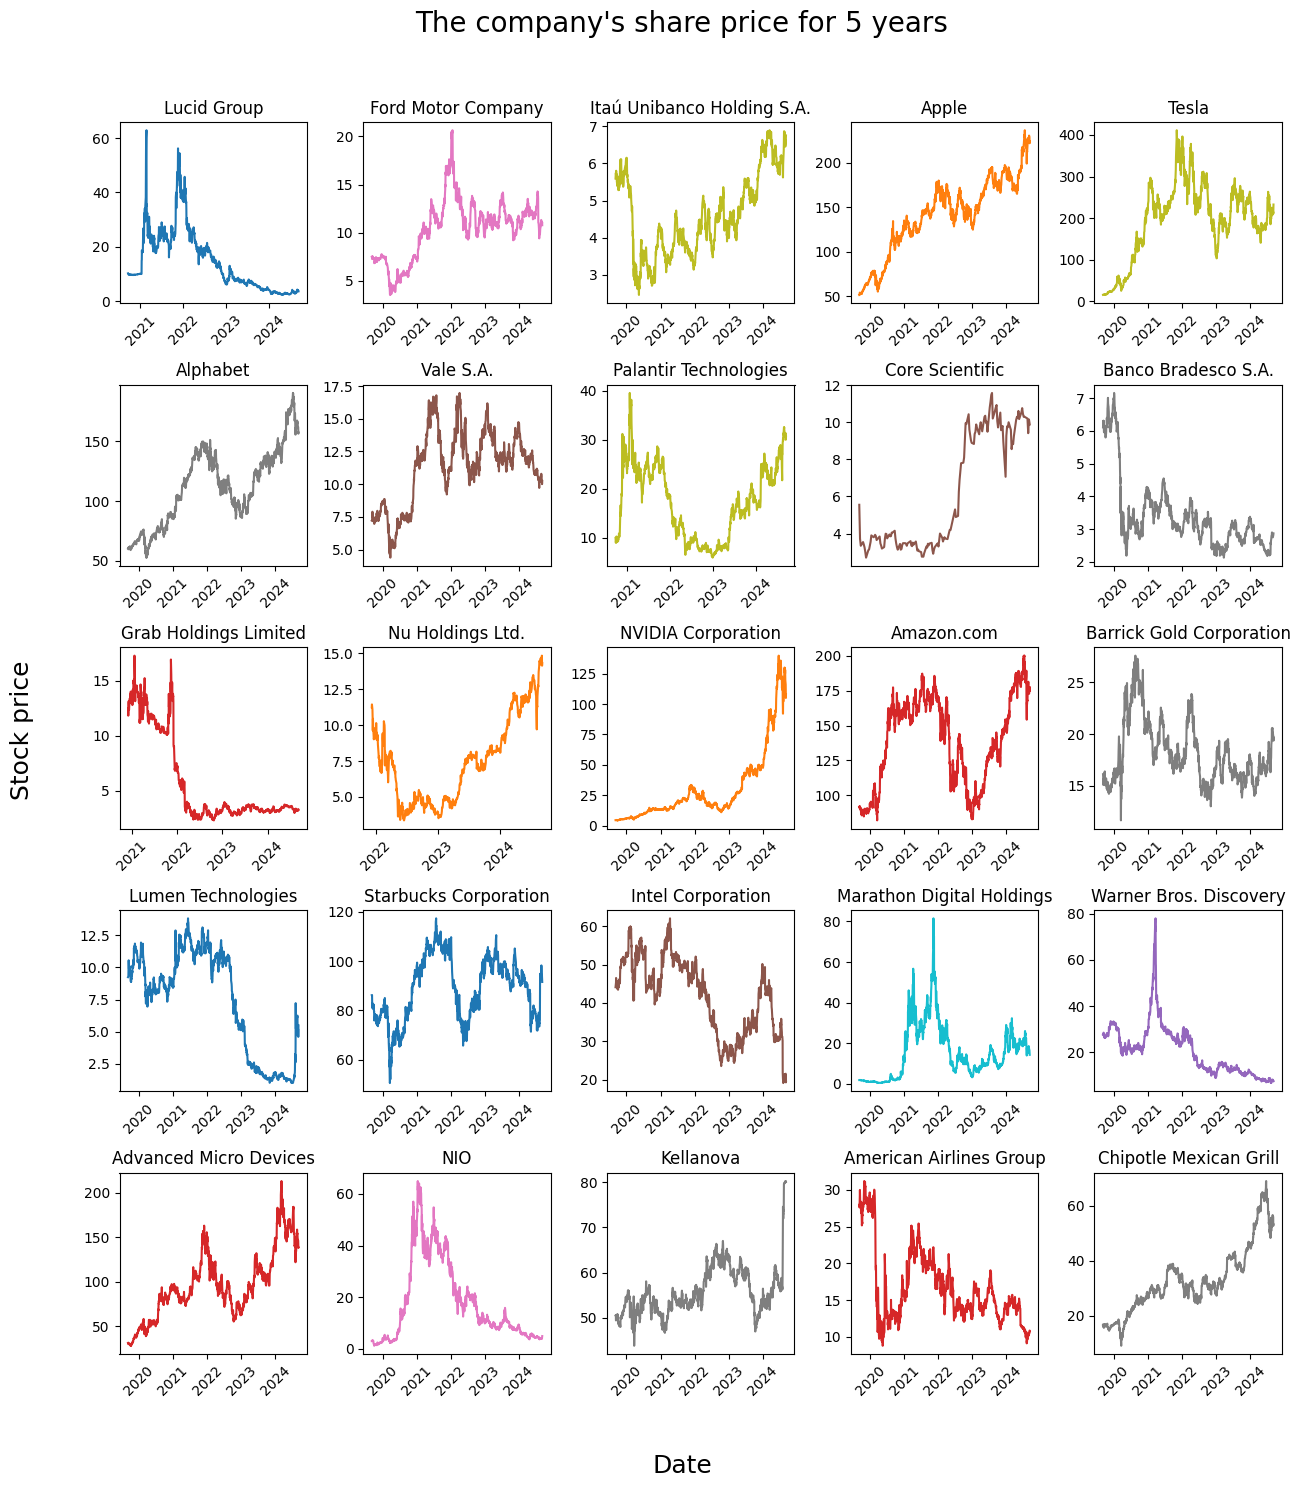

In [3]:
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import random
 
def random_color_generator():
    color = random.choice(list(mcolors.TABLEAU_COLORS.keys()))
    return color

companies_list = list(df["company"].unique())
rows = math.floor(len(companies_list)/5)
cols = math.ceil(len(companies_list)/5)

fig, ax = plt.subplots(nrows=rows, ncols=cols)
fig.subplots_adjust(hspace=0.45, wspace=0.3)
fig.set_figheight(16)
fig.set_figwidth(15)
fig.suptitle("The company's share price for 5 years", fontsize=20, y=0.95)
fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontdict={"fontsize":18})
fig.text(0.06, 0.5, 'Stock price', ha='center', va='center', rotation='vertical', fontdict={"fontsize":18})

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator()

for i in range(rows):
    for j in range(cols):
        if companies_list:
            target_company = companies_list.pop()
            ax[i, j].xaxis.set_major_formatter(formatter) 
            ax[i, j].xaxis.set_major_locator(locator)
            ax[i, j].tick_params(axis="x", labelrotation=45)
            ax[i, j].plot(df[df["company"]==target_company]["date"], df[df["company"]==target_company]["open"], label="open", color=random_color_generator())
            ax[i, j].set_title(target_company)

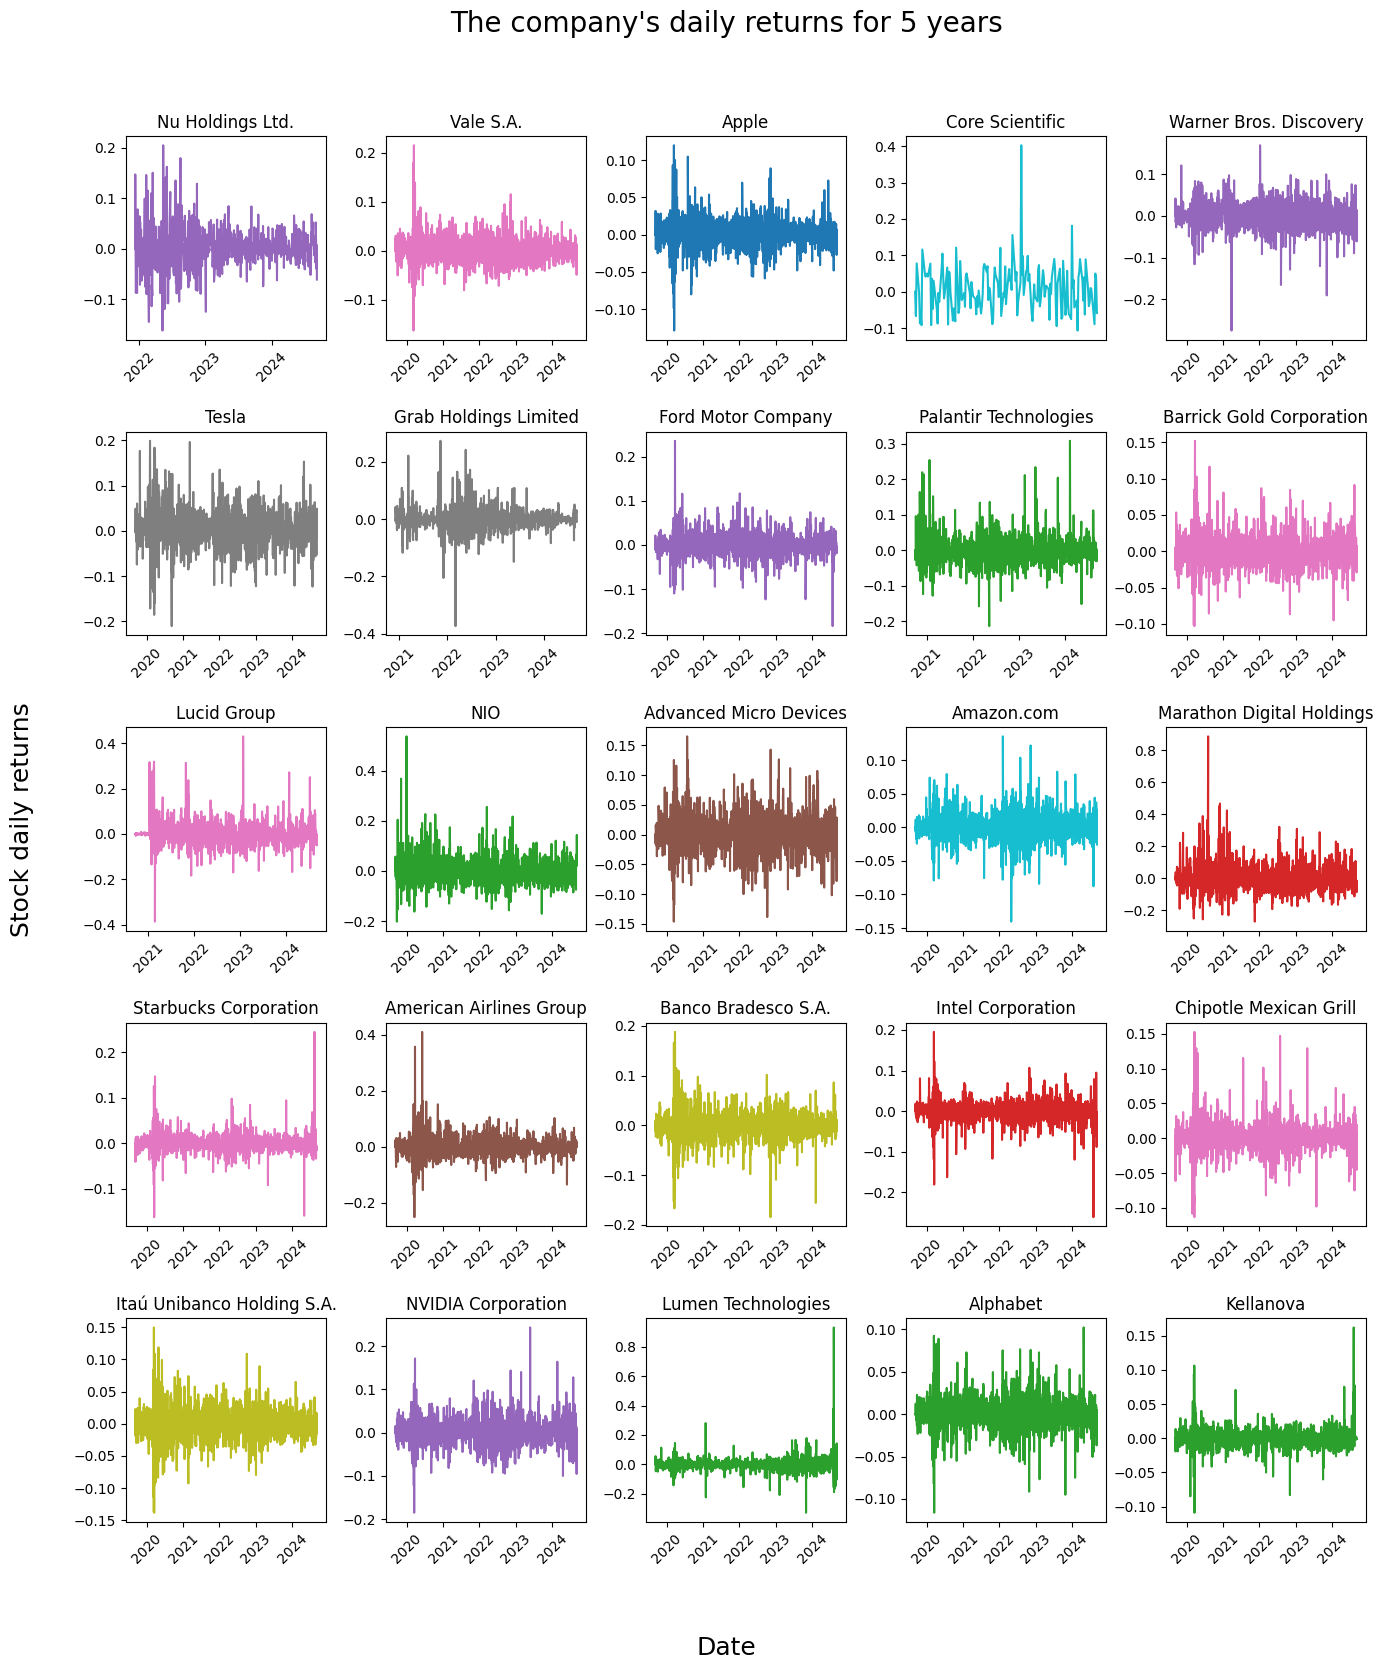

In [23]:
companies_list = list(df["company"].unique())
rows = math.floor(len(companies_list)/5)
cols = math.ceil(len(companies_list)/5)

fig, ax = plt.subplots(nrows=rows, ncols=cols)
fig.subplots_adjust(hspace=0.45, wspace=0.3)
fig.set_figheight(18)
fig.set_figwidth(16)
fig.suptitle("The company's daily returns for 5 years", fontsize=20, y=0.95)
fig.text(0.5, 0.04, 'Date', ha='center', va='center', fontdict={"fontsize":18})
fig.text(0.06, 0.5, 'Stock daily returns', ha='center', va='center', rotation='vertical', fontdict={"fontsize":18})

formatter = mdates.DateFormatter("%Y")
locator = mdates.YearLocator()

for i in range(rows):
    for j in range(cols):
        if companies_list:
            target_company = companies_list.pop()
            ax[i, j].xaxis.set_major_formatter(formatter) 
            ax[i, j].xaxis.set_major_locator(locator)
            ax[i, j].tick_params(axis="x", labelrotation=45)
            ax[i, j].plot(df[df["company"]==target_company]["date"], df[df["company"]==target_company]["daily_returns"], label="daily_returns", color=random_color_generator())
            ax[i, j].set_title(target_company)

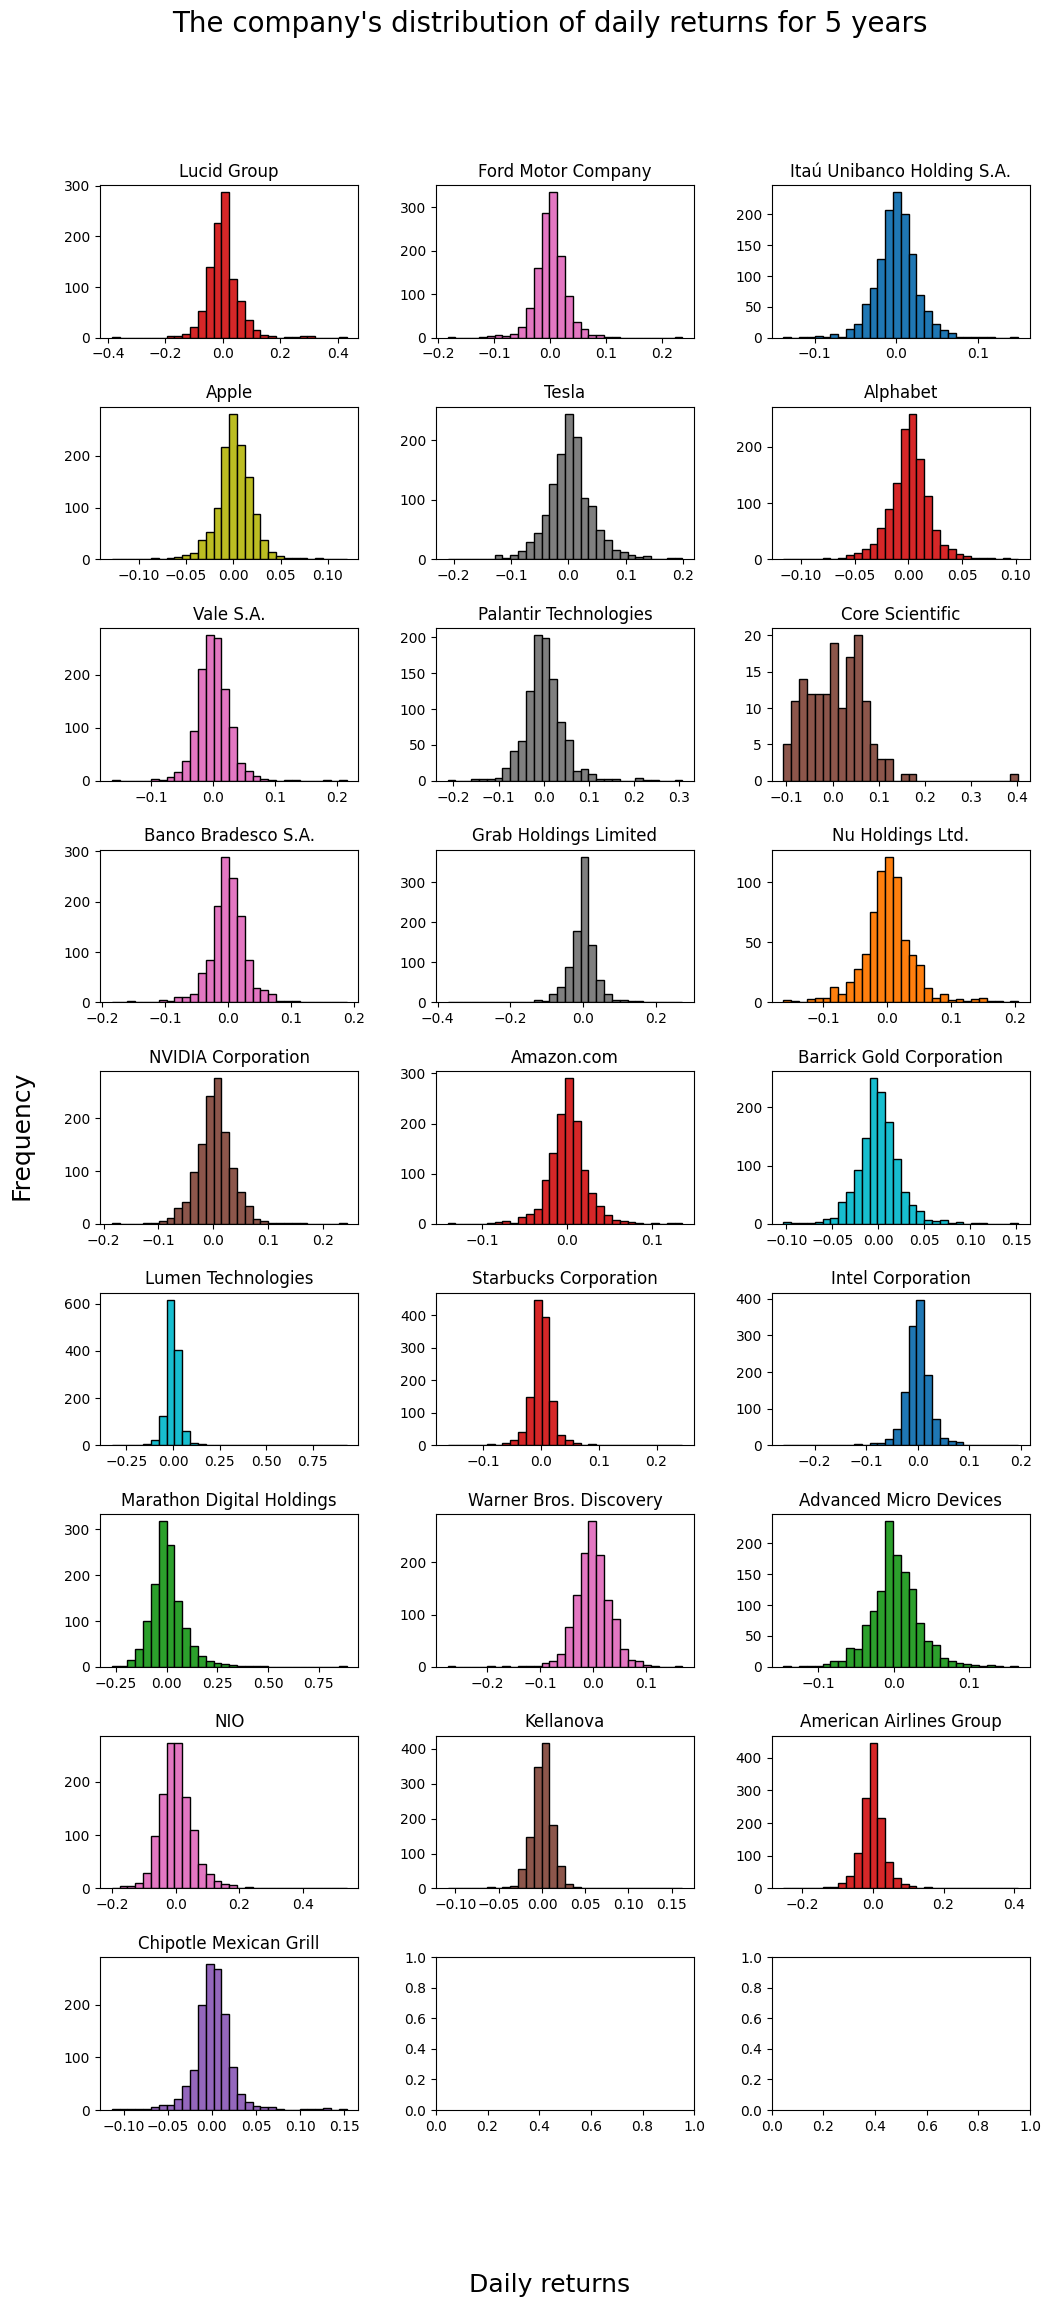

In [4]:
companies_list = list(df["company"].unique())
rows = math.ceil(len(companies_list)/3)
cols = math.floor(len(companies_list)/math.floor(len(companies_list)/3))

fig, ax = plt.subplots(nrows=rows, ncols=cols)
fig.subplots_adjust(hspace=0.45, wspace=0.3)
fig.set_figheight(25)
fig.set_figwidth(12)
fig.suptitle("The company's distribution of daily returns for 5 years", fontsize=20, y=0.95)
fig.text(0.5, 0.04, 'Daily returns', ha='center', va='center', fontdict={"fontsize":18})
fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontdict={"fontsize":18})

# formatter = mdates.DateFormatter("%Y")
# locator = mdates.YearLocator()

for i in range(rows):
    for j in range(cols):
        if companies_list:
            target_company = companies_list.pop()
            # ax[i, j].xaxis.set_major_formatter(formatter) 
            # ax[i, j].xaxis.set_major_locator(locator)
            # ax[i, j].tick_params(axis="x", labelrotation=45)
            ax[i, j].hist(df[df["company"]==target_company]['daily_returns'], bins=30, edgecolor='black',  color=random_color_generator())
            ax[i, j].set_title(target_company)

*You can see that all companies have roughly similar graphs. The value of shares over five years, depending on the company, rose or fell. At the end of 2019 and the beginning of 2020, you can see a sharp jump in all companies associated with the coronavirus. There are relatively stable companies, such as __Barrick Gold Corporation__. There are companies that grew very quickly in a short period of time and then fell just as quickly, such as __Marathon Digital Holdings__ or __Warner Bros. Discovery__. There are newcomers that have actively entered the market, such as __Core Scientific__. The distribution of daily returns over five years for almost all companies tends to be normal. But I am sure that if you take the distribution for at least a year, the picture will be completely different. Although you can still draw some conclusions on this basis - for example, that __Ford Motor Company__ has not been doing very well in the last couple of years ...*

__*P.s. Since the study uses Most Active stocks, the companies may also differ from those given in the example.*__

*It seems to me that the most accurate forecast will be for those companies whose value changes are relatively cyclical and in recent years there have been no sharp increases or decreases, but the surprise factor cannot be ruled out, an excellent example of which was the coronavirus.*

In [38]:
import tensorflow
from tensorflow import keras
import seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import datetime

First, let's check if we have a correlation between the value of shares of any companies

Text(157.72222222222223, 0.5, 'Company')

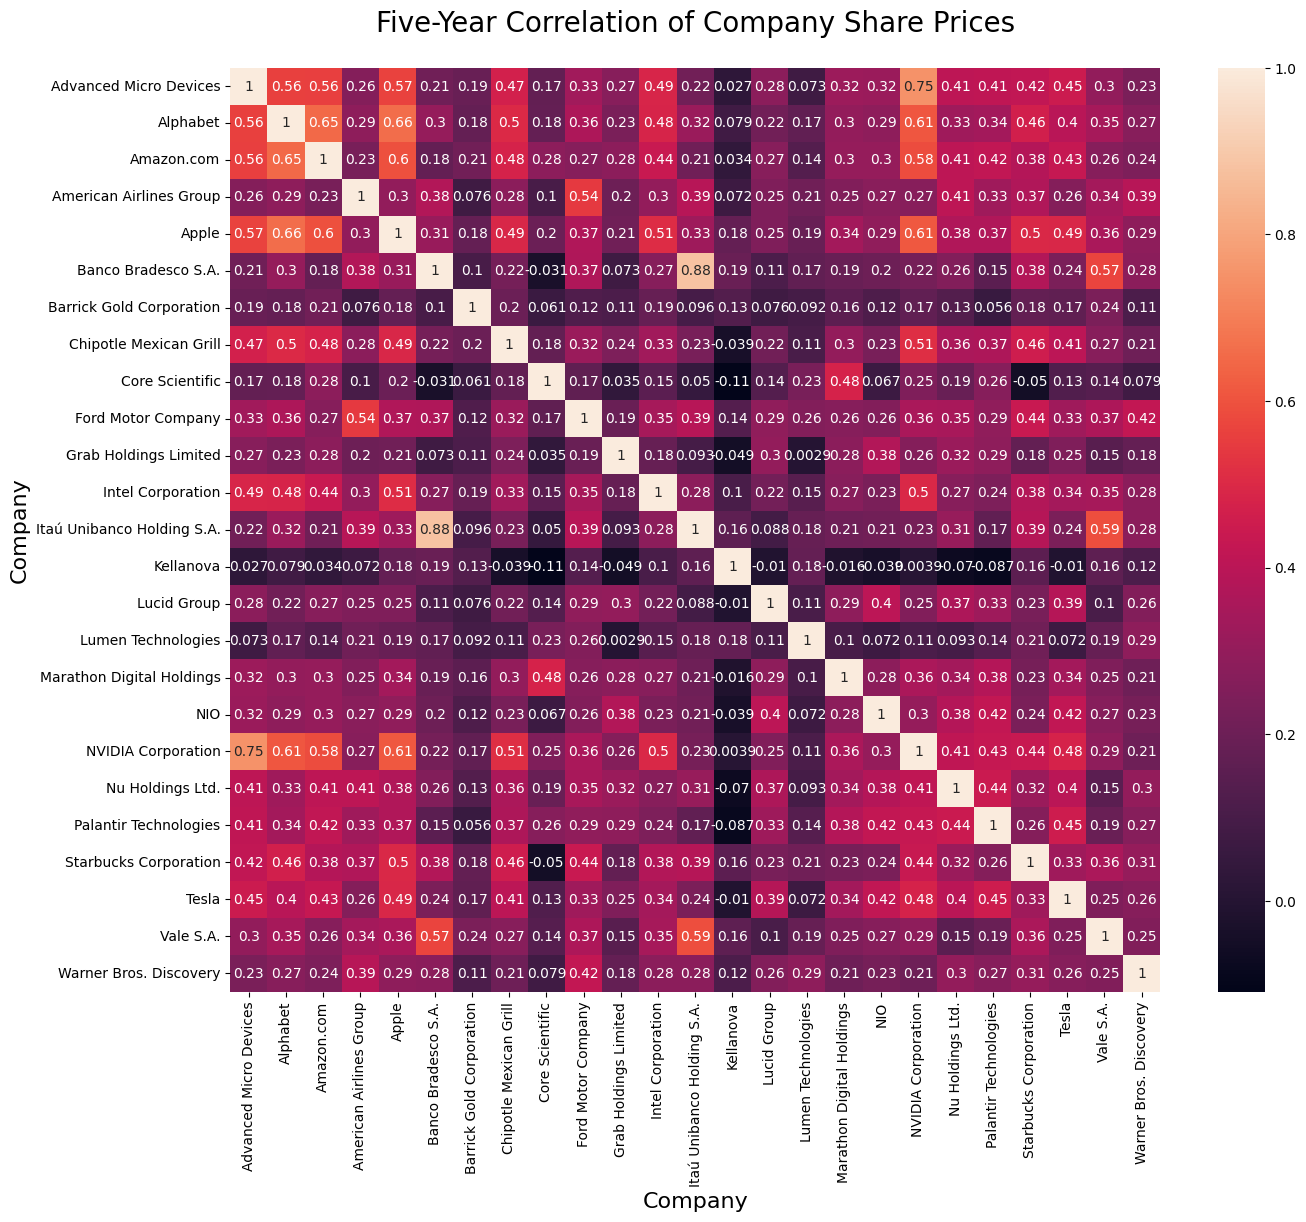

In [66]:
period = datetime.now() - relativedelta(years=5)
period_df = df[df["date"]>=period.date()]

df_corr = period_df.pivot_table(index='date', columns='company', values='daily_returns')     

plot_size = (15, 12)
fig, ax = plt.subplots(figsize=plot_size)
plot = sns.heatmap(df_corr.corr(), ax=ax, annot=True)
plot.set_title('Five-Year Correlation of Company Share Prices' , fontsize=20, y=1.03)
plot.set_xlabel('Company', fontdict={"fontsize":16})
plot.set_ylabel('Company' , fontdict={"fontsize":16})

Text(157.72222222222223, 0.5, 'Company')

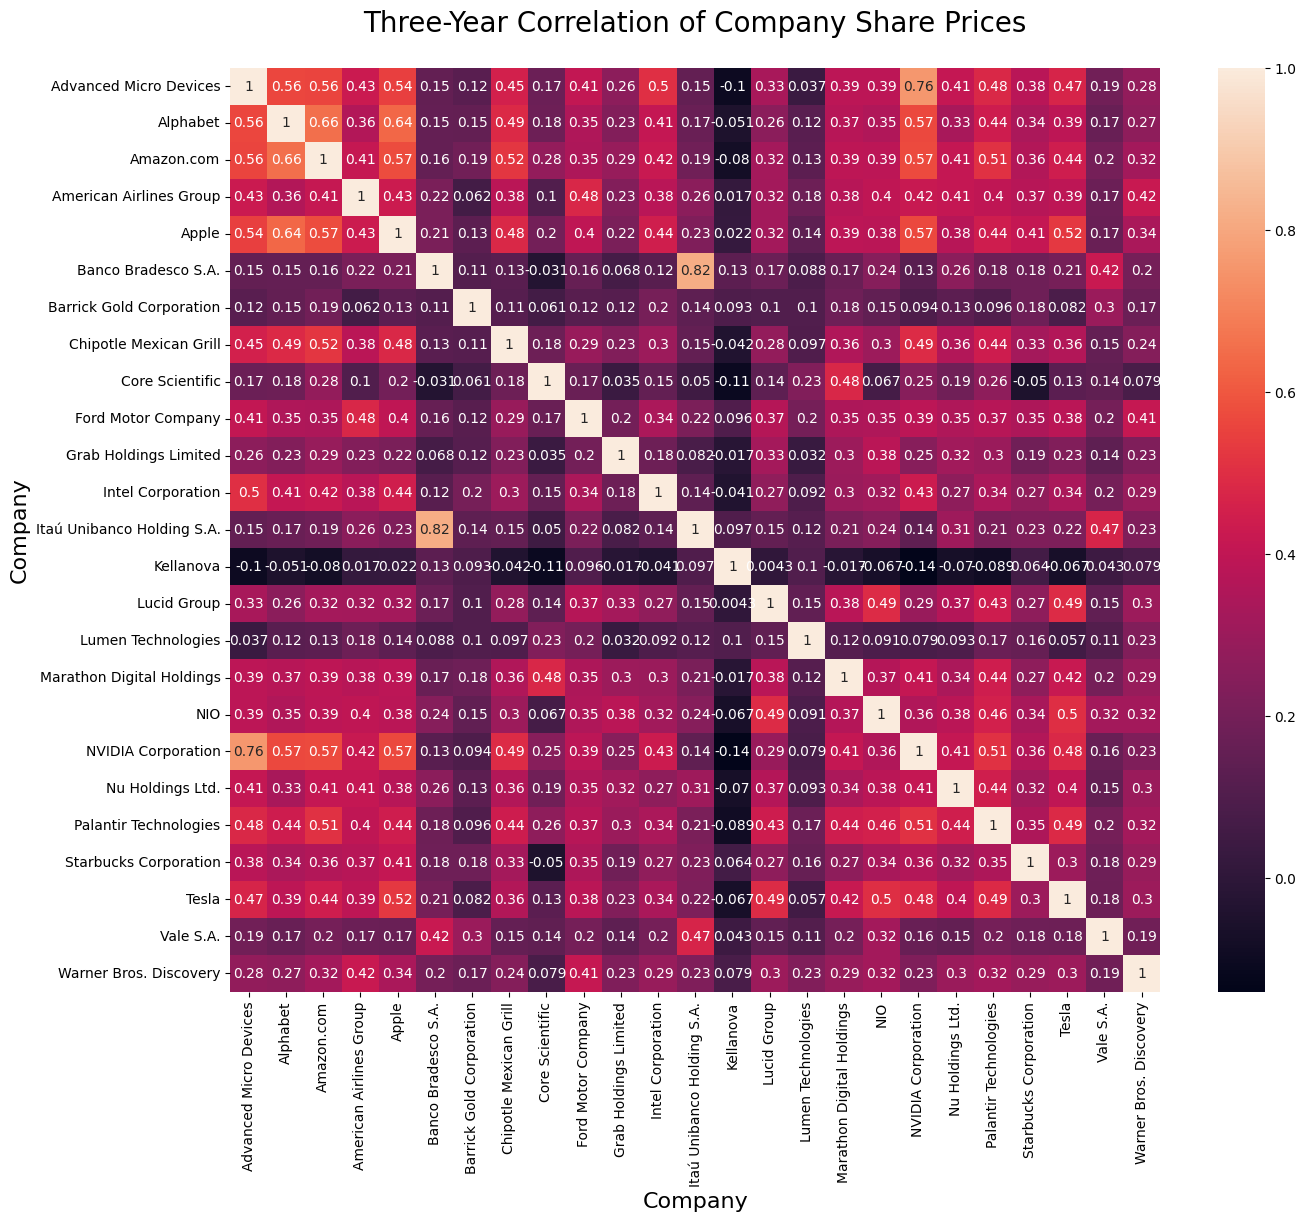

In [67]:
period = datetime.now() - relativedelta(years=3)
period_df = df[df["date"]>=period.date()]

df_corr = period_df.pivot_table(index='date', columns='company', values='daily_returns')     

plot_size = (15, 12)
fig, ax = plt.subplots(figsize=plot_size)
plot = sns.heatmap(df_corr.corr(), ax=ax, annot=True)
plot.set_title('Three-Year Correlation of Company Share Prices' , fontsize=20, y=1.03)
plot.set_xlabel('Company', fontdict={"fontsize":16})
plot.set_ylabel('Company' , fontdict={"fontsize":16})

Text(157.72222222222223, 0.5, 'Company')

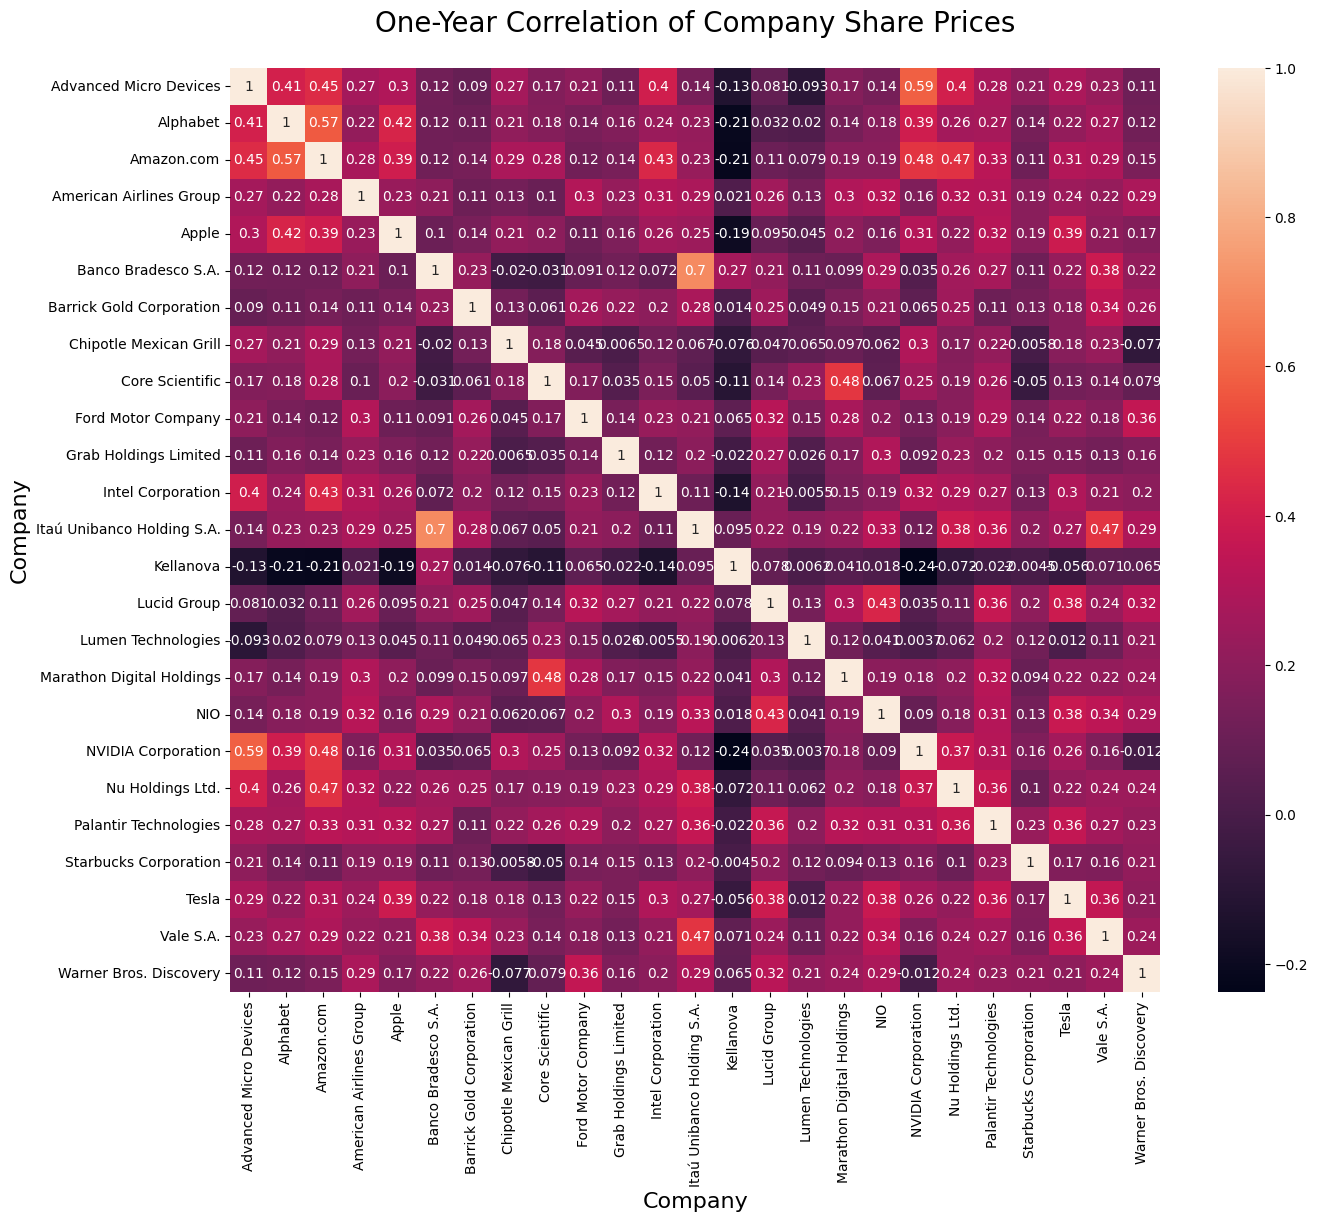

In [69]:
period = datetime.now() - relativedelta(years=1)
period_df = df[df["date"]>=period.date()]

df_corr = period_df.pivot_table(index='date', columns='company', values='daily_returns')     

plot_size = (15, 12)
fig, ax = plt.subplots(figsize=plot_size)
plot = sns.heatmap(df_corr.corr(), ax=ax, annot=True, cmap=sns.color_palette("rocket", as_cmap=True))
plot.set_title('One-Year Correlation of Company Share Prices' , fontsize=20, y=1.03)
plot.set_xlabel('Company', fontdict={"fontsize":16})
plot.set_ylabel('Company' , fontdict={"fontsize":16})